# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [1269]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [1270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

На занятии мы уже <a href="https://miptstats.github.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [1271]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [1272]:
study_data = data.sample(frac=0.7).reset_index()
study_data
test_data = data.drop(study_data.index).reset_index()
test_data

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,624,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1000,NaN,S
1,625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
2,626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q
3,627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
4,628,629,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
263,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
264,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
265,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [1273]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак


def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [1274]:
study_data, target_study_data = get_features_and_target(study_data)
test_data, target_test_data = get_features_and_target(test_data)
target_study_data

0      1
1      0
2      0
3      0
4      1
      ..
619    0
620    0
621    0
622    1
623    0
Name: Survived, Length: 624, dtype: int64

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

Разделим study_data на 2 таблички: табличка с данными про мужчин и табличка с данными про женщин. В каждую из табличек добавим колонку с целевым признаком.

In [1275]:
men_study_data = study_data[study_data['Sex'] == 'male'].drop(columns='Sex').join(target_study_data)
men_study_data

,Pclass,Age,SibSp,Parch,Fare,Survived
1,2,27.0,0,0,13.0000,0
2,1,28.0,0,0,47.1000,0
3,3,NaN,1,0,15.5000,0
6,2,46.0,0,0,26.0000,0
7,1,NaN,0,0,30.0000,1
...,...,...,...,...,...,...
618,3,19.0,0,0,7.8958,0
619,3,22.0,0,0,7.8958,0
620,3,16.0,0,0,8.0500,0
621,3,9.0,5,2,46.9000,0


In [1276]:
women_study_data = study_data[study_data['Sex'] == 'female'].drop(columns='Sex').join(target_study_data)
women_study_data

,Pclass,Age,SibSp,Parch,Fare,Survived
0,3,19.0,0,0,7.8792,1
4,2,31.0,1,1,26.2500,1
5,3,11.0,4,2,31.2750,0
13,3,30.0,0,0,8.6625,0
22,3,NaN,8,2,69.5500,0
...,...,...,...,...,...,...
613,2,3.0,1,2,41.5792,1
615,3,26.0,0,0,7.9250,1
616,3,NaN,1,0,14.4542,0
617,1,47.0,1,1,52.5542,1


In [1277]:
men_study_data.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,395.000000,310.000000,395.000000,395.000000,395.000000,395.000000
mean,2.400000,30.696516,0.400000,0.227848,24.481592,0.172152
std,0.804177,14.670901,0.948951,0.607679,39.518827,0.377991
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.500000,0.000000,0.000000,11.500000,0.000000
75%,3.000000,39.750000,0.000000,0.000000,26.550000,0.000000
max,3.000000,74.000000,8.000000,5.000000,512.329200,1.000000


In [1278]:
women_study_data.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,229.000000,196.000000,229.000000,229.000000,229.000000,229.000000
mean,2.144105,27.715561,0.707424,0.633188,45.686118,0.759825
std,0.859020,14.303569,1.230813,0.915720,60.176342,0.428125
min,1.000000,0.750000,0.000000,0.000000,6.750000,0.000000
25%,1.000000,18.000000,0.000000,0.000000,11.241700,1.000000
50%,2.000000,27.000000,0.000000,0.000000,23.250000,1.000000
75%,3.000000,36.000000,1.000000,1.000000,57.979200,1.000000
max,3.000000,63.000000,8.000000,5.000000,512.329200,1.000000


Заметим, что доля выживших женщин (~0.75) сильно больше доли выживших мужчин (~0.2). Поэтому далее будем отдельно анализировать данные таблиц мужчин и женщин.

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

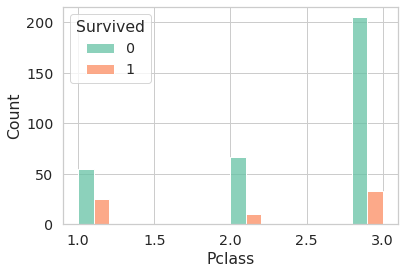

In [1279]:
sns.histplot(data=men_study_data, x='Pclass', hue='Survived', multiple='dodge')

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

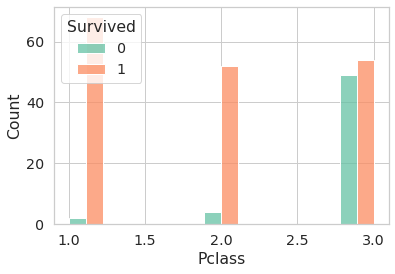

In [1280]:
sns.histplot(data=women_study_data, x='Pclass', hue='Survived', multiple='dodge')

Из этих графиков видно, что, в основном умирали мужчины и женщины третьего класса. При этом женщины всех трех классов спасались одинаково часто. Мужчины 1 и 3 класса спасались намного чаще мужчин второго.

(0.0, 100.0)

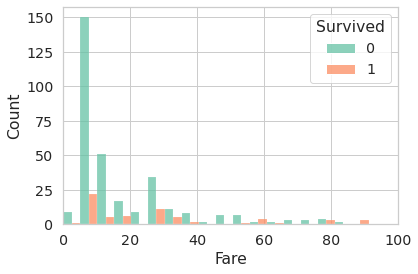

In [1281]:
sns.histplot(data=men_study_data, x='Fare', hue='Survived', multiple='dodge')
plt.xlim(0, 100)

(0.0, 200.0)

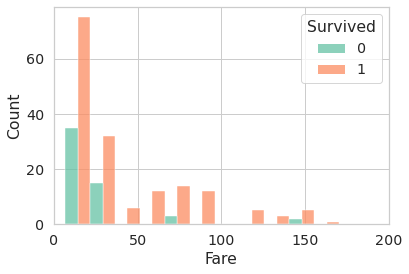

In [1282]:
sns.histplot(data=women_study_data, x='Fare', hue='Survived', multiple='dodge')
plt.xlim(0, 200)

Чаще всего умирали мужчины и женщины, заплатившие за проезд довольно мало (Fare около 10 для мужчин и 10-20 для женщин). Мужчины, заплатившие больше 30, спасались примерно одинаково часто (в процентном соотношении). Женщины, заплатившие больше 50 практически не умирали. Графики выживаемости от платы за проезд логически соотносятся с графиками выживаемости от класса.

<AxesSubplot:xlabel='Age', ylabel='Count'>

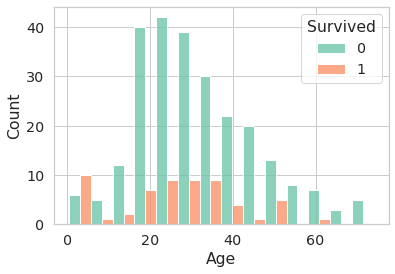

In [1283]:
sns.histplot(data=men_study_data, x='Age', hue='Survived', multiple='dodge')

Из графика видно, что выживали в основном дети и мужчины в возрасте около 30 лет. Чаще всего умирали мужчины в возрасте около 20 лет. Мужчины в возрасте 50-70 лет почти не спасались.

<AxesSubplot:xlabel='Age', ylabel='Count'>

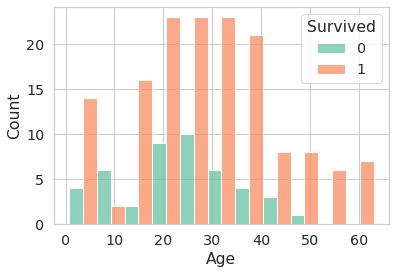

In [1284]:
sns.histplot(data=women_study_data, x='Age', hue='Survived', multiple='dodge')

Чаще всего умирали женщины в возрасте ~0-9 и ~15-25 лет. Чаще всего выживали женщины 30-35 лет (в процентном соотношении). Женщины старше 45 практически не умирали.

(0.0, 3.0)

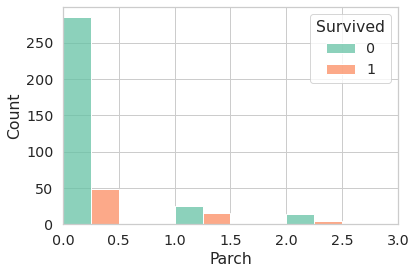

In [1285]:
sns.histplot(data=men_study_data, x='Parch', hue='Survived', multiple='dodge')
plt.xlim(0, 3)

Чаще всего погибали мужчины без родителей/детей на корабле. Мужчины с 1 или 2 родителями/детьми на корабле умирали чуть чаще, чем выживали.

<AxesSubplot:xlabel='Parch', ylabel='Count'>

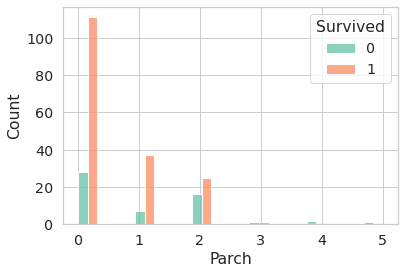

In [1286]:
sns.histplot(data=women_study_data, x='Parch', hue='Survived', multiple='dodge')

Женщины с 0 или 1 ребенком/родителем намного чаще выживали, чем умирали. Женщины с 2 детьми выживали чуть чаще, чем умирали. Женщины с 4 и более детьми/родителями на корабле практически не выживали.

#### 3. Классификация

На основе проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

1) Сначала посмотрим на пол человека:

    1.1) Если мужчина, то говорим, что человек умер

    1.2) Если женщина, то посмотрим на количество родителей/детей:

        1.2.1) Если Parch 3 или меньше, говорим, что человек выжил.

        1.2.2) Иначе говорим, что человек умер.

**Дерево 2:**

2) Сначала посмотрим на возраст человека:

    2.1) Если возраст меньше либо равен 20, то говорим, что человек умер.

    2.2) Иначе посмотрим на класс:

        2.2.1) Если 1 класс, говорим, что человек выжил.

        2.2.2) Иначе говорим, что человек умер.

Реализуйте полученные деревья по шаблону

In [1287]:
def tree_first(features):

    predict_list = []

    for index, row in features.iterrows():
        values = row.to_dict()

        if values['Sex'] == 'male':
            predict_list.append(0)

        elif values['Parch'] <= 3:
            predict_list.append(1)

        else:
            predict_list.append(0)

    predicted = pd.Series(predict_list)

    return predicted

In [1288]:
def tree_second(features):

    predict_list = []

    for index, row in features.iterrows():
        values = row.to_dict()

        if values['Age'] <= 20:
            predict_list.append(0)

        elif values['Pclass'] == 1:
            predict_list.append(1)

        else:
            predict_list.append(0)

    predicted = pd.Series(predict_list)

    return predicted

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

...

Реализуйте данный критерий по шаблону

In [1289]:
def criteria(target, predicted):
    return len(target[target == predicted]) / len(target)

Посчитайте качество полученных ранее деревьев.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [1290]:
test_data = test_data.join(target_test_data)

quality = criteria(test_data['Survived'], tree_first(test_data))
print('first_tree_quality ', quality)

quality = criteria(test_data['Survived'], tree_second(test_data))
print('second_tree_quality ', quality)

first_tree_quality  0.7902621722846442
second_tree_quality  0.7191011235955056


**5. Метод ближайшего соседа**

В домашнем задании 1 вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [1291]:
def knn(features, train_features, train_target, k=1):

    predicted = None

    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''

    ...
    return predicted

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

#### 6. Выводы

1) Примерно 3/4 женщин выжили, при том что примерно 4/5 мужчин погибли. Эти два факта связаны и объясняются тем, что мужчины помогали женщинам спасаться, жертвуя собой.

2) Люди, заплатившие за проезд большую сумму умирали реже, чем заплатившие маленькую сумму. Кроме того люди из кают 1 и 2 класса умирали реже, чем люди из кают 3-го. Логично, что, те кто заплатили больше, получили каюты лучших классов. Эти люди зачастую спасались, весьма вероятно, используя свое положение.

3) Те, у кого не было родителей/детей на корабле, умирали чаще остальных. Это, скорее всего, обусловлено тем, что они были лишены всякой поддержки при попытках спасения и часто действовали самостоятельно.

4) БОльшая часть детей выжила. Очевидно, что при крушении родители пытались спасти своих детей. Кроме того, многие женщины, у которых было 4 или более детей погибли практически все. Это говорит о том, что эти женщины погибали, пытаясь спасти как можно больше своих детей.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

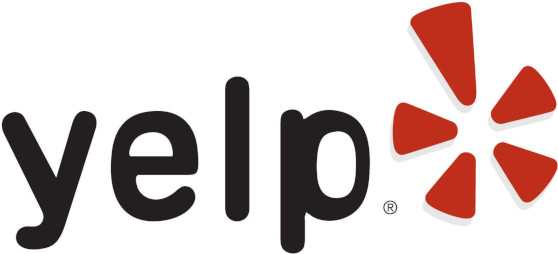

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [1292]:
...

Ellipsis

Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [1293]:
...

Ellipsis

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

In [1294]:
...

Ellipsis

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы. 

In [1295]:
...

Ellipsis

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб. Рекомендуется сохранить карту в html и отправить ее отдельным файлом в бот.

In [1296]:
...

Ellipsis

Если все получилось, вы молодцы! Далее в этой задаче тоже можно делать интерактивные карты.

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [1297]:
...

Ellipsis

В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [1298]:
...

Ellipsis

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [1299]:
...

Ellipsis

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [1300]:
...

Ellipsis

Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [1301]:
...

Ellipsis

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

In [1302]:
...

Ellipsis

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [1303]:
...

Ellipsis

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

In [1304]:
...

Ellipsis

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** <...>

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [1305]:
...

Ellipsis

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** <...>

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [1306]:
...

Ellipsis

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** <...>

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [1307]:
...

Ellipsis

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [1308]:
...

Ellipsis

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** <...>